In [1]:
!pip install nepalitokenizers

     |████████████████████████████████| 678 kB 22 kB/s eta 0:00:013
     |████████████████████████████████| 3.8 MB 52 kB/s eta 0:00:018
     |████████████████████████████████| 330 kB 235 kB/s eta 0:00:01
     |████████████████████████████████| 168 kB 173 kB/s eta 0:00:01
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2022.2.0
    Uninstalling fsspec-2022.2.0:
      Successfully uninstalled fsspec-2022.2.0
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.14.1
    Uninstalling huggingface-hub-0.14.1:
      Successfully uninstalled huggingface-hub-0.14.1
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.13.2
    Uninstalling tokenizers-0.13.2:
      Successfully uninstalled tokenizers-0.13.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 4.29.1 requires t

## Tokenization

Tokenization is a way of separating a piece of text into smaller units called tokens. Here, tokens can be either words, characters, or subwords. 

In [3]:
from nepalitokenizers import WordPiece

In [1]:
text = "जरुर साथी म पागलल ! यस्तै छ मेरो हाल । म शब्दलाई देख्दछु ! दृश्यलाई सुन्दछु ! बासनालाई संबाद लिन्छु ।"
set(text.split(" "))

{'!',
 'छ',
 'जरुर',
 'दृश्यलाई',
 'देख्दछु',
 'पागलल',
 'बासनालाई',
 'म',
 'मेरो',
 'यस्तै',
 'लिन्छु',
 'शब्दलाई',
 'संबाद',
 'साथी',
 'सुन्दछु',
 'हाल',
 '।'}

In [18]:
chars = sorted(list(set(text)))
chars

[' ',
 '!',
 'ं',
 'ई',
 'ख',
 'ग',
 'छ',
 'ज',
 'त',
 'थ',
 'द',
 'न',
 'प',
 'ब',
 'म',
 'य',
 'र',
 'ल',
 'श',
 'स',
 'ह',
 'ा',
 'ि',
 'ी',
 'ु',
 'ृ',
 'े',
 'ै',
 'ो',
 '्',
 '।']

In [21]:
text = "जरुर साथी म पागलल ! यस्तै छ मेरो हाल । म शब्दलाई देख्दछु ! दृश्यलाई सुन्दछु ! बासनालाई संबाद लिन्छु ।"

tokenizer_wp = WordPiece()

tokens = tokenizer_wp.encode(text)
# print(tokens.ids)
print(tokens.tokens)

# print(tokenizer_wp.decode(tokens.ids))


['[CLS]', 'जरुर', 'साथी', 'म', 'पागल', '##ल', '!', 'यस्तै', 'छ', 'मेरो', 'हाल', '।', 'म', 'शब्द', '##लाई', 'देख्', '##दछ', '##ु', '!', 'दृश्य', '##लाई', 'सुन्द', '##छु', '!', 'बास', '##नालाई', 'सं', '##बाद', 'लिन्छ', '##ु', '।', '[SEP]']


In [1]:
!pip install gensim

In [3]:
from gensim.models import KeyedVectors

In [4]:
# Load vectors
model = KeyedVectors.load_word2vec_format('nepali_embeddings_word2vec.txt', binary=False)

In [5]:
# find similarity between words
model.similarity('फेसबूक','इन्स्टाग्राम')

0.6848251

In [24]:
#most similar words
model.most_similar('ठमेल')

[('दरबारमार्ग', 0.7122325897216797),
 ('न्युरोड', 0.6694843769073486),
 ('लेकसाइड', 0.6377348303794861),
 ('दरवारमार्ग', 0.6375789642333984),
 ('न्यूरोड', 0.6284393072128296),
 ('गोंगबु', 0.5993576049804688),
 ('सामाखुसी', 0.5941020846366882),
 ('सुन्धारा', 0.5935229063034058),
 ('खिचापोखरी', 0.5931926369667053),
 ('सोह्रखुट्टे', 0.5908025503158569)]

In [12]:
model.most_similar(negative=['सामाखुसी'], topn=4)

[('संस्थामाथि', 0.2488771378993988),
 ('अस्वीकार्य', 0.24636368453502655),
 ('विरोधीहरू', 0.23992130160331726),
 ('पाण्डित्याइंँ', 0.23950663208961487)]

In [18]:
model.most_similar(positive=['असन','लुगा'], topn=10)

[('कपडा', 0.680996835231781),
 ('इन्द्रचोक', 0.6624463200569153),
 ('साडी', 0.6408320069313049),
 ('कुर्तासुरुवाल', 0.6299434900283813),
 ('चप्पल', 0.6188048720359802),
 ('लुगाफाटो', 0.6060008406639099),
 ('वस्त्र', 0.6026648283004761),
 ('महाबौद्ध', 0.5928323268890381),
 ('स्वेटर', 0.5919166803359985),
 ('मास्क', 0.5901544094085693)]

In [25]:
model.most_similar('पनि')

[('तर', 0.7165363430976868),
 ('चाहिँ', 0.5734356641769409),
 ('समेत', 0.5724846720695496),
 ('त्यो', 0.519405722618103),
 ('त्यस', 0.5168119668960571),
 ('सबै', 0.5114452242851257),
 ('धेरै', 0.5003280639648438),
 ('उन', 0.48373737931251526),
 ('उनीहरू', 0.45430347323417664),
 ('हुन्छ', 0.45415595173835754)]

In [5]:
पनि = "0.036105454 -1.8477407 -0.13292415 -1.054519 -0.75723153 0.88331956 -1.2355062 1.572536 -0.4185772 -1.7308868 -3.0795765 -1.4024017 1.3271847 -1.6900196 0.028248938 -0.020036256 1.9555819 0.67553514 0.9522195 0.24258117 -1.0932448 -0.29953676 1.510639 -5.7209115 -2.9420626 0.79292834 0.108124115 -1.7135367 0.9534989 -3.2164938 -2.6067665 3.1845415 -0.6392931 -2.4526682 0.36511832 0.59759784 -2.7394722 1.1973991 0.44205064 -0.7519377 0.34458315 1.0926725 -0.008429072 2.0788295 1.5260656 1.2469018 -0.87512374 1.2471554 -1.3628584 -0.2966962 -0.3874319 1.1339737 -2.395181 -0.42233625 -3.4603453 -0.81635493 2.5847666 1.4684092 -1.2405634 -1.2110137 0.051675085 1.0239811 0.6413754 -2.6613777 0.3796324 -1.0012805 2.3699255 1.3876312 2.061795 -3.0584364 0.46307465 0.578025 2.293551 0.2610847 0.16610031 -0.48604447 1.0200049 1.515435 -0.83810675 1.613811 -1.0599878 -0.26281735 -1.5001932 1.9989077 -1.6633978 -2.111326 2.1575782 -0.99626654 0.7382445 -0.4449215 0.5270611 1.6269698 1.804164 1.6715075 -1.6826664 0.41902706 -0.1541009 4.0142245 -2.0075037 0.4513515 0.45400575 -0.086178266 -1.329884 -1.6115603 -0.3585717 0.56803334 0.6077233 0.56981343 0.9348113 1.1004871 -0.40822154 2.7152538 -1.0744182 -1.0317935 -0.32957777 2.3195207 3.5314171 -0.72891355 -3.0966806 -0.9936411 -0.41760772 -4.0478086 -2.0358174 0.4760597 -2.7315254 3.9518104 -0.5828034 -0.73025805 0.6934488 0.58690065 -1.4295702 0.9142831 -0.38837814 -0.0279514 0.26378947 -3.189781 0.14854401 -1.5819656 1.1315334 -0.6411931 3.6990957 1.2308646 1.9235945 0.18650058 1.0409868 0.4276344 -1.170229 0.651712 1.8597227 -1.0810702 0.5623238 -1.5745676 1.9961917 -0.5024656 0.5453102 2.1581142 0.6794214 -0.45078862 -0.24448721 -1.0305794 0.73008066 0.6275564 -1.0940442 -0.77269274 2.1769807 0.5690209 -0.39980885 -0.68953925 -1.3871573 1.2484084 -1.6227766 1.9776213 3.9351916 1.6311036 -1.8757704 -4.004551 0.92914116 2.5690362 -1.3115917 -0.7779292 1.5145802 2.290284 -0.3312917 1.3774136 -2.9158363 2.0260763 0.38167053 1.1134776 2.5563645 -1.544143 0.9424815 0.33248287 0.82143515 0.54762095 2.6897159 -1.9019939 1.9634618 -2.330352 0.12319062 -2.9159594 -0.5857997 2.087264 -1.5134318 0.24642111 -1.2147491 -2.050281 3.1495154 1.1286228 -0.7233807 1.8238802 -0.34721148 -1.3392767 -0.8365579 1.558754 2.9524956 4.2156973 -3.4193873 -0.7768824 1.195616 -0.5633778 3.635242 1.8756752 -1.4231883 0.8031608 0.038783584 0.36655027 0.0573941 1.0240018 -3.0517488 3.3000531 1.6197073 1.1284362 0.74610865 -0.41006517 -2.2774816 0.3903321 -1.483917 1.4144377 2.640394 2.5072155 -0.16210543 -0.4307213 -1.3619933 2.4653368 2.6837845 1.7184992 1.5710528 0.6696842 2.1798866 1.66658 2.2540479 -1.2041949 0.645373 2.5443587 2.825519 0.3377641 0.64845955 -2.6960478 1.0147587 0.88065636 0.5163133 0.0061805123 0.74622667 -0.023730636 -0.87919927 0.83251476 2.6655037 1.1700681 0.13156599 2.671318 -1.2305369 -1.4341248 -1.7141101 -0.8199812 -0.98164845 -0.15675583 1.8390291 0.124839224 -0.15356901 0.6555776 -2.4370897 -3.3708715 0.8142937 1.009793 -0.6222795 0.83099645 -1.0010566 -2.190405 -3.3889253 -0.7450899 2.4497626 -1.7516689 -2.3506606 2.6787024 1.3085818 -1.6934747 -0.29813656 -0.9533791 -0.5951886 -0.18380442"

In [6]:
pani = पनि.split(" ")

In [7]:
len(pani)

300

In [8]:
तर = "1.7562301 -0.99288344 -0.9499141 -1.5441036 0.34862864 1.5240647 -0.5390366 0.5733298 0.06446577 -3.2254882 -2.0093374 -2.1569679 1.6490712 -2.4024568 -1.4689231 -0.4367391 1.8886646 -0.21621676 2.7799046 -0.44133547 1.20448 -1.6676491 0.5306937 -3.627174 -2.2142613 1.4113761 -0.81592286 -2.245361 -0.78052217 -3.739398 -2.0151193 0.54944694 -0.39428142 -3.8647914 -1.1868559 1.1690687 -3.7695165 -0.5408664 0.014705445 -0.32214662 0.6017838 -0.915135 -0.702499 1.2026023 1.7917057 1.7670931 -0.26272857 -1.4365503 0.5681478 0.08999124 -0.150736 -0.09441168 -2.1519873 -2.05404 -2.4383848 0.35534883 0.5705626 2.1435177 -1.3155595 -2.987505 -1.5907319 1.7576351 0.76001906 -3.117717 2.8610933 -0.21095678 -0.19370976 0.97216195 1.2069191 -1.0139692 0.70291597 1.5463544 0.63554496 -0.8662616 -1.5855076 -0.9290691 1.3558502 1.6018035 1.8633282 5.042003 -0.5179533 0.42231876 2.3208606 3.1192338 -1.2946299 -2.2211647 0.21388584 -1.1385348 0.9274114 0.31638172 1.5499023 0.38710123 0.64125437 1.9020821 0.5817923 -0.82984287 0.378407 3.5844915 -3.1536806 -0.87748885 -1.064707 0.2272638 0.28724724 -0.47008458 -2.4363053 -1.0131764 -0.34993386 0.3793285 2.8385994 0.32398793 -1.132869 2.8757775 0.79580986 -0.4020516 -0.2696274 0.29875258 1.9215511 -0.89347464 -1.0587724 -1.4548463 -0.27278462 -2.2121787 -1.3571117 -0.2521914 -2.9466364 2.9122407 -0.36823514 -0.57276905 1.5534239 0.9717768 -2.7372994 1.5101898 1.5480639 -0.44031188 -1.3778706 -2.0247183 0.016602369 0.119561404 -0.076548465 -0.9791908 3.6651592 1.3680509 1.9216782 1.5780085 1.5636967 -2.0123808 -1.1874604 0.20624267 -0.42325872 -1.5343554 0.8667784 0.06568576 0.6637409 -0.24654976 0.31320485 2.0441597 0.97512245 -1.5347155 1.3408157 -0.7671867 0.89819473 1.147161 0.33707577 -0.89175874 2.4387753 1.63138 0.8569717 0.9714421 0.49132434 0.23969406 -3.4314644 -0.24262269 3.4988544 1.305721 0.068984546 -1.255274 0.09721863 1.6799512 -0.027106239 -0.6033862 -0.8515623 2.2770262 -1.4527892 1.6191206 -2.5492759 3.6519125 -1.4025139 -0.22729534 3.791379 0.19651866 0.4608924 1.3158599 0.43719968 -0.9515502 0.25204507 0.1773529 0.05137641 -0.50635606 1.4062992 -3.0253232 -0.6492052 1.7365146 1.1491032 -0.68803895 -1.471742 -2.6490467 2.563428 -0.32601213 -3.654487 1.5210565 0.52301824 0.6852964 -0.25738072 1.8505875 3.676138 3.418715 -3.2630699 -0.97237664 0.87035 -0.2961821 3.1465306 2.412338 -0.9677222 0.904892 0.5978942 -1.4479624 -1.3492047 0.08432779 -2.773885 1.8611237 0.8195996 0.40515733 0.7641204 3.3253863 -0.06835651 1.0639828 -1.1143272 0.08251778 1.054202 1.9193621 -0.20479721 0.72453177 -2.0881946 2.7205946 3.355587 0.66587985 0.71497124 -1.0374647 2.673646 2.4310107 2.3692236 0.17255405 2.6561894 2.5409324 4.0789113 -0.98319757 0.3238368 -2.2472296 1.6765296 2.5081265 3.2677102 0.5263509 0.08845231 -0.1941622 -0.34331802 1.1581246 2.087178 4.0394254 -1.2757872 3.0430264 -0.41959733 0.650024 -0.42173275 -0.021121986 -0.27402058 -0.6335683 0.6450668 -1.3605822 -0.23235317 1.135007 -2.5104957 -4.2839417 0.7743099 0.331383 0.45785692 -3.1157234 1.863119 -2.617106 -0.022676054 0.10811506 1.9770255 -1.7407993 -1.6948276 1.197088 1.706316 -1.6599652 -1.7610174 0.3056662 -0.41049063 -2.399566"

In [9]:
tara = तर.split(" ")

In [10]:
len(tara)

300

In [11]:
असन = "0.375138 0.17189674 -0.008599805 -0.122877866 0.055162746 1.0298958 0.09128014 1.0243455 0.38089353 0.97504795 1.3886096 -1.204185 0.43871987 0.59473175 0.82409126 -0.697143 -0.53452915 -1.9632086 0.7211485 -1.5010923 0.56131893 -0.048601735 0.9844488 -0.988277 -1.598793 -1.790664 -2.1199965 0.0064454325 0.22754283 1.2664919 -0.35021296 -1.4382633 0.67901856 -1.7193631 0.5331874 -0.67186683 0.29818782 1.0261756 -0.51449996 -0.064025134 0.91478616 -0.33781794 0.30325878 -0.5483225 -0.34228015 2.3620954 0.6712946 -0.3419677 0.15208131 1.0442795 0.8306188 0.17183205 0.555486 0.4502216 -0.6877226 -1.3380475 -1.3891282 1.9931388 0.4352453 0.7527175 -0.0361381 -1.0397488 1.9197044 0.75537723 -0.25713372 0.677662 1.5460142 -0.17427096 2.4797597 -1.0504476 -0.13074087 -0.5002578 1.0995051 1.8448693 -1.1532503 -0.043443322 0.0012981581 -1.2448205 0.88375556 0.44713217 0.20504114 -2.024155 -0.065666124 -1.4992307 -0.1974367 -1.7178527 1.4135504 -0.4374675 -0.15115441 1.2822367 0.95043075 -2.6607327 0.042300172 1.0394509 -1.0044367 -0.55023724 1.6287683 -0.5553402 -0.6484731 0.44556588 -1.5245651 -0.36205605 -0.7715883 -0.02720205 0.39965037 0.9174092 -0.66039824 0.71524537 0.11710889 -1.2876856 -0.9125243 -0.49897277 0.68784404 1.1604936 0.7424041 -0.7228751 -0.9908435 -0.4199231 0.81791586 1.1827282 0.27511263 -1.7196752 -1.3887825 0.30810368 -1.005669 1.0104846 -0.61474377 0.5985419 -0.31100008 0.2834102 0.24138644 0.6111722 0.36433908 0.6537512 -2.1383767 0.6134696 -0.16458686 0.12883033 0.41937393 0.43124983 -0.6345043 0.37902555 -1.542688 1.2422249 -0.81646526 0.4462487 -0.6099873 1.2746758 1.7135694 -0.23855914 -0.00503104 -0.101739906 1.006029 -0.70253366 -1.29313 0.40282437 0.41985258 -0.37289882 -2.2492607 0.9142749 -0.97087395 -1.1128815 -2.2001386 -0.28635794 0.71510136 -1.0879999 2.6119947 -0.3558906 -0.6870341 -0.48819643 -0.79549164 -0.9942171 1.5558971 0.7293389 0.41266984 1.2287682 -0.48654047 0.062778704 -1.0888965 0.11128135 0.22160946 2.053377 -1.4043489 0.1721104 0.10219619 1.3943849 -2.198389 -0.31643137 -1.3391478 -0.43201777 0.5649507 -0.15570845 -1.4183208 -1.7442111 0.17039345 -3.3641398 -0.917493 -0.96650183 0.014387653 -0.9094259 -1.3558098 0.65827113 0.89642996 0.5027126 0.02541331 -0.13663846 0.6319361 -1.657953 -0.47077474 -0.66621107 0.6958694 -0.7047664 0.8120369 -2.727532 -0.5250146 -1.0375875 1.1632962 -1.4620899 0.63348216 -0.19310603 -1.4616679 -0.5111794 -1.8511429 -0.12367679 -0.14155412 2.2073994 -0.75496435 2.4400947 0.5001693 1.1604029 1.4348779 -1.2736783 1.535877 -1.4776859 0.41845787 -0.96387535 -2.6570528 1.3639665 -1.1745774 1.1069763 1.3045801 -1.075079 0.723855 -2.2769282 0.7639075 -0.2364159 0.18739216 1.8167278 -0.21009322 1.4531994 -0.93253034 0.7238086 0.70382607 0.24372716 -0.050296016 -1.8046235 -0.15525179 -2.6975346 -0.16235624 0.15100041 -1.6884751 -0.021023745 0.64817446 -0.77001226 -0.7085017 -1.5842644 1.5036995 1.1766261 -2.6544788 3.224998 -1.0225842 -0.9908746 1.2824805 -1.8496401 -0.22633772 -1.4819351 0.7968174 0.5843095 -0.028760402 -0.21216998 -0.9108219 0.6351245 -0.5204805 1.5167074 0.80797535 0.98413026 -1.1761227 0.40825275 -1.9806604 0.82562226 0.4175012 -0.79882056 0.7023587 -0.5156415 -0.6514125 -0.26053706 -0.17093968 -2.3805668 -1.2987138 -1.8459494"
asan = असन.split(" ")

In [12]:
from numpy.linalg import norm
import numpy as np

np_pani = np.array(pani, dtype='float64')
np_tara = np.array(tara, dtype='float64')
np_asan = np.array(asan, dtype='float64')

cos_sim = (np_pani @ np_tara.T)/(norm(np_pani)*norm(np_tara))
print("तर पनि", cos_sim)

cos_sim = (np_pani @ np_asan.T)/(norm(np_pani)*norm(np_asan))
print("तर असन", cos_sim)

तर पनि 0.7165363181049488
तर असन 0.10855490277033357


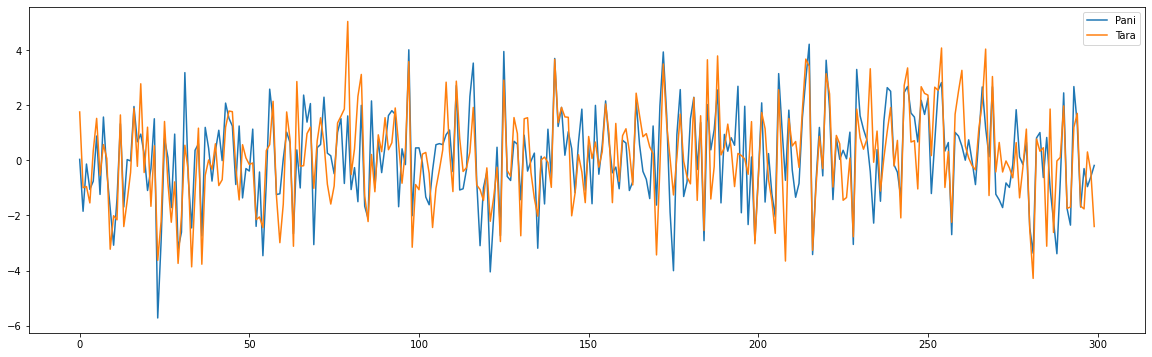

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,6))
plt.plot(np_pani, label="Pani")
plt.plot(np_tara, label="Tara")
plt.legend()
plt.show()

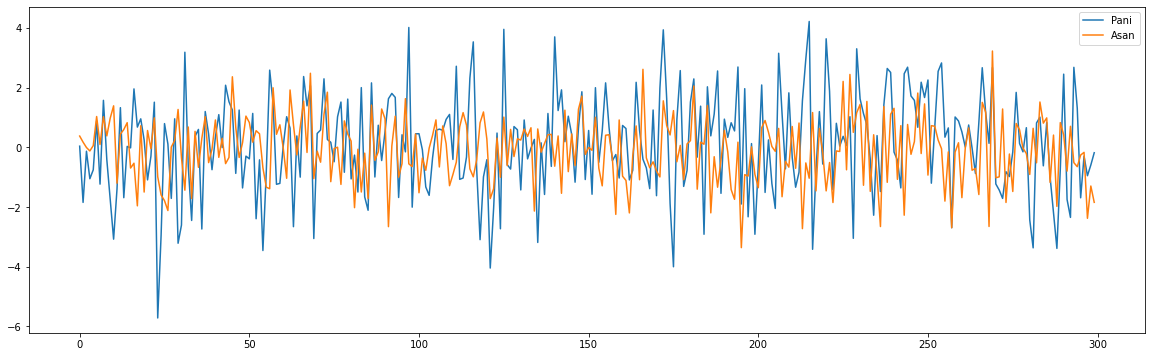

In [74]:
plt.figure(figsize=(20,6))
plt.plot(np_pani, label="Pani")
plt.plot(np_asan, label="Asan")
plt.legend()
plt.show()